Using the dataset for the risk of heart attack with class imbalance:

 1. Create a logistic regression model and measure the performance of it.
 2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
clv =  pd.read_csv('cleveland-0_vs_4.csv')

In [3]:
clv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [4]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [5]:
clv.describe().T

,count,mean,std,min,25%,50%,75%,max
age,177.0,53.107345,9.659240,29.0,45.0,53.0,60.0,77.0
sex,177.0,0.581921,0.494643,0.0,0.0,1.0,1.0,1.0
cp,177.0,2.858757,0.939865,1.0,2.0,3.0,4.0,4.0
trestbps,177.0,129.949153,16.417587,94.0,120.0,130.0,140.0,180.0
chol,177.0,243.429379,54.350994,126.0,209.0,234.0,269.0,564.0
fbs,177.0,0.135593,0.343327,0.0,0.0,0.0,0.0,1.0
restecg,177.0,0.892655,0.991327,0.0,0.0,0.0,2.0,2.0
thalach,177.0,157.073446,19.746410,96.0,146.0,160.0,172.0,202.0
exang,177.0,0.163842,0.371182,0.0,0.0,0.0,0.0,1.0
oldpeak,177.0,0.716949,0.953430,0.0,0.0,0.3,1.2,4.4


In [6]:
categorical = [col for col in clv.columns if clv[col].dtype=='O']
for i in categorical:
    print('Value counts:', clv[i].value_counts())
    print('='*30)

Value counts: 0.0       133
1.0        24
2.0         9
3.0         8
<null>      3
Name: ca, dtype: int64
Value counts: 3.0       131
7.0        37
6.0         8
<null>      1
Name: thal, dtype: int64
Value counts: negative    164
positive     13
Name: num, dtype: int64


In [7]:
for col in categorical:
    clv[col].replace({'<null>':clv[col].value_counts().idxmax()}, inplace=True)

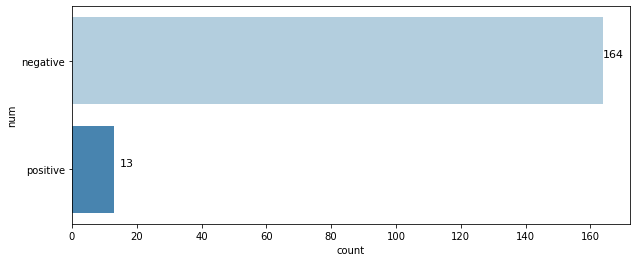

In [8]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(y='num',data=clv, palette='Blues')
for p in ax.patches:
    ax.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(20, -40), fontsize=11, color='black', textcoords='offset points',
                horizontalalignment='right')

In [9]:
X = clv.drop('num', axis=1)
y = clv['num']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [11]:
log = LogisticRegression(max_iter=1000)
log_model = log.fit(X_train, y_train)


In [12]:
y_pred_test = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)

In [13]:
print("Train Accuracy: {}".format(log_model.score(X_train, y_train)))
print("Test Accuracy: {}".format(log_model.score(X_test, y_test)))

Train Accuracy: 0.9858156028368794
Test Accuracy: 0.9444444444444444


#### Only 7.34% of the data points is classified as positive. Therefore, it can easily be said that the dataset is not balanced . We should change the performance measure metric of model . Because accuracy may be misleading. 

In [14]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

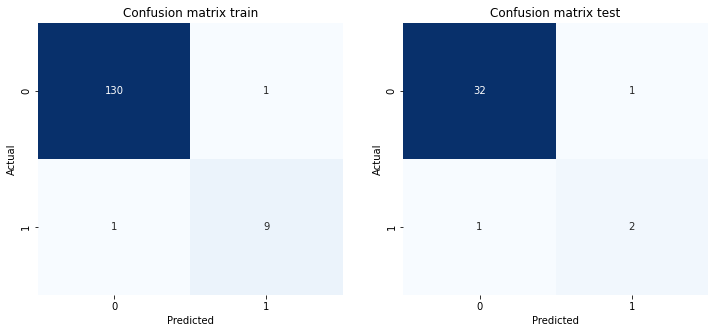

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix_train,annot=True,fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix train')  
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix_test,annot=True,fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix test') 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 1 of 3 'positive' classes in the test set is misclassified .

## Resampling Dataset

In [16]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)
    
    log = LogisticRegression(max_iter=1000)
    log_model = log.fit(X_train, y_train)

    y_pred_train = log_model.predict(X_train)
    y_pred_test = log_model.predict(X_test)
    
    print("Accuracy : {}\n".format(log_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, y_pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, y_pred_test))
    
    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix_train,annot=True,fmt='d',cmap='Blues', cbar=False)
    plt.title('Confusion matrix train')  
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix_test,annot=True,fmt='d',cmap='Blues', cbar=False)
    plt.title('Confusion matrix test') 
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Up-Sampling

In [17]:
negative = clv[clv['num'] == 'negative']
positive = clv[clv['num'] == 'positive']

positive_upsampled = resample(positive,
                              replace=True,
                              n_samples=len(negative),
                              random_state=42)

upsampled_clv = pd.concat([negative, positive_upsampled])

upsampled_clv['num'].value_counts()

negative    164
positive    164
Name: num, dtype: int64

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98       131
    positive       0.97      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.99      0.98      0.98       262
weighted avg       0.99      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98        33
    positive       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



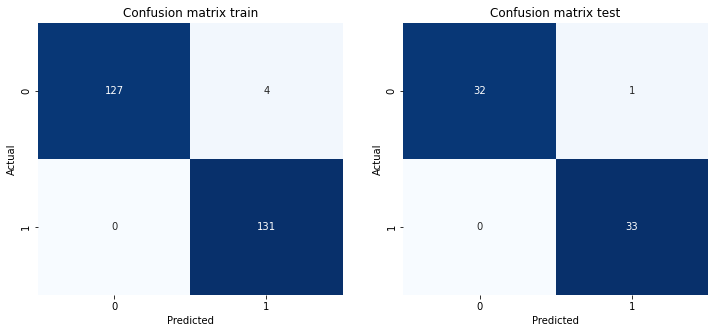

In [18]:
X = upsampled_clv.drop('num', axis=1)
y = upsampled_clv['num']

create_model(X, y)

### Down-Sampling

In [19]:
negative_downsampled = resample(negative,
                                replace=True,
                                n_samples=len(positive),
                                random_state=42)

downsampled_clv = pd.concat([negative_downsampled, positive])

downsampled_clv['num'].value_counts()

negative    13
positive    13
Name: num, dtype: int64

Accuracy : 0.6666666666666666

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        10
    positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

    negative       0.60      1.00      0.75         3
    positive       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



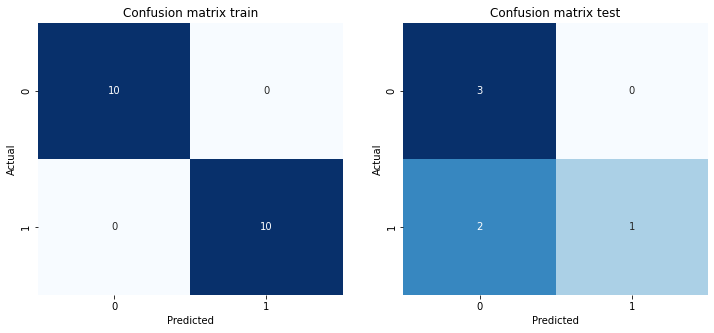

In [20]:
X = downsampled_clv.drop('num', axis=1)
y = downsampled_clv['num']

create_model(X, y)

#### Since we have less data, it failed more than the other method.2 of 3 'positive' classes in the test set is misclassified .

## Producing Synthetic Samples


### SMOTE

In [21]:
X = clv.drop('num', axis=1)
y = clv['num']

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X, y)

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.98      0.99       131
    positive       0.98      1.00      0.99       131

    accuracy                           0.99       262
   macro avg       0.99      0.99      0.99       262
weighted avg       0.99      0.99      0.99       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98        33
    positive       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



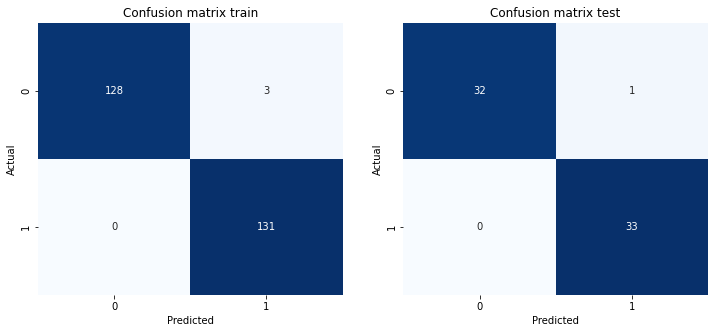

In [22]:
create_model(X_smote, y_smote)

### ADASYN

In [23]:
X = clv.drop('num', axis=1)
y = clv['num']

ad = ADASYN(random_state=27, sampling_strategy=1.0)
X_adasyn, y_adasyn = ad.fit_resample(X, y)

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.98      0.99       131
    positive       0.98      1.00      0.99       132

    accuracy                           0.99       263
   macro avg       0.99      0.99      0.99       263
weighted avg       0.99      0.99      0.99       263

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98        33
    positive       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



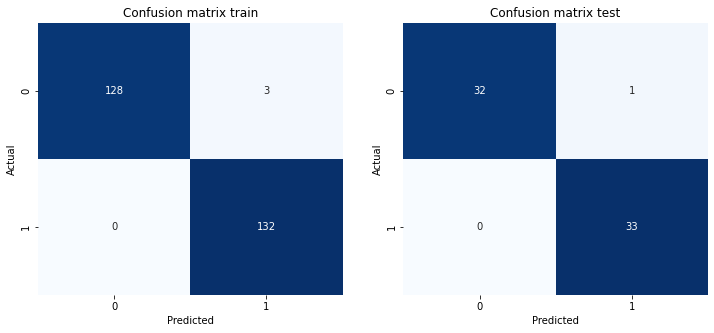

In [24]:
create_model(X_adasyn, y_adasyn)

#### Producing Synthetic Samples methods gave best results.